# Natural Language Processing: Assignment 1

By Hana Shah and Kristal Tan Kar Yee

# 1. Introduction

This is an NLP project that focuses on exploratory text analysis on a Reddit posts dataset to determine the most common Long Covid symptoms experienced by people with history of Covid-19. This project uses several Python libraries such as:


*   PRAW (For Reddit data scraping)
*   Pandas
*   Numpy
*   NLTK (For text pre-processing)
*   String
*   Re (For regular expression)
*   Matplotlib, wordcloud, PIL, random (For data visualization)












# Table Of Contents

1. [Introduction](#intro)
2. [Data Scraping/Acquisition](#dataq)
3. [Data Cleaning](#datac)
4. [Data Visualization](#datav)
5. [Conclusion](#conclude)

<a id="dataq"></a>
# Data Scraping/Acquisition

#### Importing Libraries
Importing all libraries needed. More libraries will be imported if required.

In [ ]:
pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 188 kB 5.3 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 18 kB/s 


In [ ]:
import pandas as pd
import numpy as np
import praw
import string
import nltk
from nltk.corpus import stopwords # For stop words
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from nltk.tokenize import word_tokenize # to create word tokens
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
import re

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
reddit = praw.Reddit(client_id='b_8FjYgoAJU5VJX1Ksc0tA', client_secret='OWEb2YOwRVreWptuxQRpmnsdz2U93g', user_agent='Data WebScraping',check_for_async=False)

In [ ]:
# get 1000 posts from the LongCovid subreddit
posts = []
lc_subreddit = reddit.subreddit('LongCovid')
for post in lc_subreddit.hot(limit=1000):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
print(posts)

                                                 title  score      id  \
0    Post-Covid Headache: Symptoms, Causes and Trea...     33  v4tqz8   
1                    Vagus Nerve Stim WARNING (Urgent)     10  z1vbs9   
2       Anyone else constantly “under the weather” 🤧??      7  z1vahm   
3                            Links to studies for LDN?      5  z1tl79   
4    Did you ‘recover’ from Covid before Long Covid...      1  z21e8g   
..                                                 ...    ...     ...   
977       Medication/Supplements to help with fatigue?      9  xcf7pa   
978  Anyone have an app(android preferred) to track...      1  xcw034   
979  Can you help? Is there anyone with similar sym...      5  xckc8k   
980           Media coverage — article link sharing :)      0  xculhz   
981                                Excessive yawning??      1  xcu0g0   

     subreddit                                                url  \
0    LongCovid  https://www.reddit.com/r/LongCovid/com

## Data Assessment

In [ ]:
# Checking the number of rows and columns
posts.shape

(982, 8)

In [ ]:
# Checking the first five rows of dataframe
posts.head()

,title,score,id,subreddit,url,num_comments,body,created
0,"Post-Covid Headache: Symptoms, Causes and Trea...",33,v4tqz8,LongCovid,https://www.reddit.com/r/LongCovid/comments/v4...,51,"**Neura Health Post-Covid Headache: Symptoms, ...",1654364074
1,Vagus Nerve Stim WARNING (Urgent),10,z1vbs9,LongCovid,https://www.reddit.com/r/LongCovid/comments/z1...,25,Last night I finally used an electrotherapy de...,1669128206
2,Anyone else constantly “under the weather” 🤧??,7,z1vahm,LongCovid,https://www.reddit.com/r/LongCovid/comments/z1...,3,Seems as if my immune system is now non existe...,1669128121
3,Links to studies for LDN?,5,z1tl79,LongCovid,https://www.reddit.com/r/LongCovid/comments/z1...,7,"Hi, does anyone have any links to studies show...",1669123678
4,Did you ‘recover’ from Covid before Long Covid...,1,z21e8g,LongCovid,https://www.reddit.com/r/LongCovid/comments/z2...,0,Trying really hard to work out whether having ...,1669142783


In [ ]:
# Checking the last five rows of dataframe
posts.tail()

,title,score,id,subreddit,url,num_comments,body,created
977,Medication/Supplements to help with fatigue?,9,xcf7pa,LongCovid,https://www.reddit.com/r/LongCovid/comments/xc...,21,"Hey long haulers, I’m struggling with fatigue ...",1662995163
978,Anyone have an app(android preferred) to track...,1,xcw034,LongCovid,https://www.reddit.com/r/LongCovid/comments/xc...,1,"Title. \nNotepads don't work, calender doesn...",1663037548
979,Can you help? Is there anyone with similar sym...,5,xckc8k,LongCovid,https://www.reddit.com/r/LongCovid/comments/xc...,9,Hi!\n\nI have read so many people's stories on...,1663007300
980,Media coverage — article link sharing :),0,xculhz,LongCovid,https://www.reddit.com/r/LongCovid/comments/xc...,0,"Hello fellow fighters <3, what do you think ha...",1663033562
981,Excessive yawning??,1,xcu0g0,LongCovid,https://www.reddit.com/r/LongCovid/comments/xc...,15,So I got covid (pretty sure omicron) 01/2022 a...,1663031907


In [ ]:
# Checking for duplicates
posts.duplicated(subset='id').sum()

0

In [ ]:
# Checking for missing data or null
posts.isnull().sum()

title             0
score             0
id                0
subreddit         0
url               0
num_comments      0
body            155
created           0
dtype: int64

In [ ]:
# Drop rows with null values in body because there are no text to analyse in those rows
posts = posts.dropna()

In [ ]:
# Checking for missing data or null
posts.isnull().sum()

title           0
score           0
id              0
subreddit       0
url             0
num_comments    0
body            0
created         0
dtype: int64

In [ ]:
posts.shape

(827, 9)

In [ ]:
# Checking the datatypes of each column
posts.dtypes

title           object
score            int64
id              object
subreddit       object
url             object
num_comments     int64
body            object
created          int64
dtype: object

<a id="datac"></a>
# 3. Data Cleaning
The text data is pre-processed before being analysed because the raw text data may contain unimportant text that might affect the accuracy of the analysis.

#### The 'body' feature contains the users' posts. We will only use that feature for the text analysis.

In [ ]:
# Install all the necessary packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
emojis = list(UNICODE_EMOJI.keys())

In [ ]:
# preProcess posts for sentiment analysis
def preprocessPosts(body):
    body = body.lower()
    # Cleaning and removing URL’s
    body = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", body, flags = re.MULTILINE)
    body = body.translate(str.maketrans('', '', string.punctuation))
    # Cleaning and removing the emojis from the posts text
    body_tokens = word_tokenize(body)  
    filtered_words = [w for w in body_tokens if w not in emojis]
    # Cleaning and removing punctuations
    unpunctuated_words = [w for w in filtered_words if w not in string.punctuation]
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in unpunctuated_words]
    return " ".join(lemma_words)

In [ ]:
# Generate a new column called 'Processed Posts' by applying preprocessed posts function to the nlp_text dataframe.
posts['Processed_Posts'] = posts['body'].apply(preprocessPosts)
posts.head()

,title,score,id,subreddit,url,num_comments,body,created,Processed_Posts
0,"Post-Covid Headache: Symptoms, Causes and Trea...",33,v4tqz8,LongCovid,https://www.reddit.com/r/LongCovid/comments/v4...,51,"**Neura Health Post-Covid Headache: Symptoms, ...",1654364074,neura health postcovid headache symptom cause ...
1,Vagus Nerve Stim WARNING (Urgent),10,z1vbs9,LongCovid,https://www.reddit.com/r/LongCovid/comments/z1...,25,Last night I finally used an electrotherapy de...,1669128206,last night i finally used an electrotherapy de...
2,Anyone else constantly “under the weather” 🤧??,7,z1vahm,LongCovid,https://www.reddit.com/r/LongCovid/comments/z1...,3,Seems as if my immune system is now non existe...,1669128121,seems a if my immune system is now non existen...
3,Links to studies for LDN?,5,z1tl79,LongCovid,https://www.reddit.com/r/LongCovid/comments/z1...,7,"Hi, does anyone have any links to studies show...",1669123678,hi doe anyone have any link to study showing t...
4,Did you ‘recover’ from Covid before Long Covid...,1,z21e8g,LongCovid,https://www.reddit.com/r/LongCovid/comments/z2...,0,Trying really hard to work out whether having ...,1669142783,trying really hard to work out whether having ...


In [ ]:
# Create a new dataframe to store only the relevant feature to be used from the 'posts' dataframe which is the Processed_Posts column.
nlp_text = posts['Processed_Posts']
nlp_text.head()

0    neura health postcovid headache symptom cause ...
1    last night i finally used an electrotherapy de...
2    seems a if my immune system is now non existen...
3    hi doe anyone have any link to study showing t...
4    trying really hard to work out whether having ...
Name: Processed_Posts, dtype: object

In [ ]:
# Export the dataframe to a txt file
nlp_text.to_csv("NLP_text.txt", index=False)

# 4. Data Visualization

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Defining my NLTK stop words and my user-defined stop words
# We remove stop words to generate a word cloud that contains only the words that might describe the corpus
stop_words = list(stopwords.words('english'))
user_stop_words = ["i", "i'm", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", 
                   "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
                   "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
                   "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", 
                   "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "i'll","we'll","they'll","you'll","she'll","he'll","'ll","n't",
                   "'s",'anyone','today','yesterday','day', 'already', 'year', 'many', 'much', 'amp', 'next', 'cant', 'wont', 'hadnt','havent', 'hasnt', 
                   'isnt', 'shouldnt', "didn't", "couldn't", 'wasnt', 'werent','mustnt', 
                   'been…','aht', 've', 'next',"all", "any", "both", "each", 'by',
                  'year',]

alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets 

In [ ]:
posts['Processed_Posts_2'] = nlp_text['Processed_Posts'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
nlp_vis = posts['Processed_Posts_2']

In [ ]:
# Importing necessary libraries
import random
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Extract all posts into one long string with each word separate with a "space"
posts_long_string = nlp_vis.tolist()
posts_long_string = " ".join(posts_long_string)

In [ ]:
# Create function to generate the blue colour for the Word CLoud
def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(54, 99%%, %d%%)" % random.randint(50, 80)

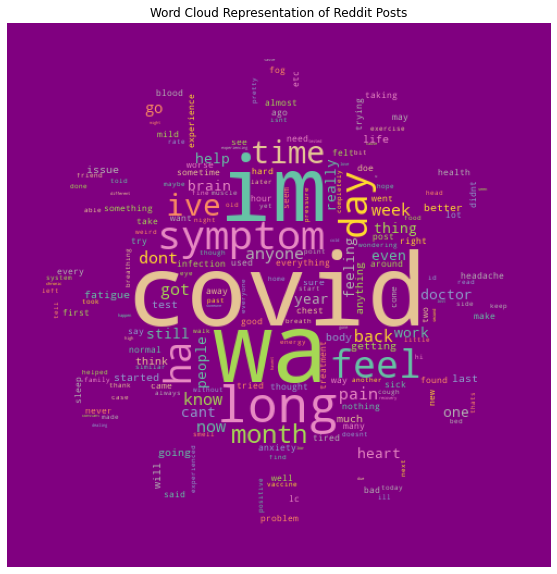

In [ ]:
# Import Covid Logo
image = np.array(Image.open('/content/covid.png'))
    
# Generate word cloud
word_cloud = WordCloud(
    width=5000,
    height=3000,
    random_state=123,
    background_color="purple",
    colormap="Set2",
    collocations=False,
    mask=image
).generate(posts_long_string)

# Display the generated Word Cloud
plt.figure(figsize=[15,10], facecolor='none')
plt.imshow(word_cloud)
plt.axis("off")
plt.title('Word Cloud Representation of Reddit Posts')
plt.show()